In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
import matplotlib.animation as animation


import warnings
warnings.filterwarnings("ignore")

In [33]:
def single_site_number_operator(N, M, site_index, synth_level, states):
    dim = M**N
    number_operator_matrix = np.zeros((dim, dim), dtype=np.complex128)
    
    for k in range(dim):
        if states[k][site_index] == synth_level:
            number_operator_matrix[k,k] = 1
             
    return number_operator_matrix

def plot_wavefunction_occupancy(state, N, M, states, ax=None, title=None, cmap='viridis'):
    """
    Plots the occupation number grid for a given wavefunction.

    Parameters:
        state (np.ndarray): The wavefunction to plot (1D array).
        N (int): Number of real-space sites.
        M (int): Number of synthetic levels.
        states (list): List of basis states from enumerate_states(N, M).
        normalize (bool): Whether to normalize by the max occupancy.
        ax (matplotlib.axes.Axes): Optional axis to plot into.
        title (str): Optional plot title.
        cmap (str): Colormap to use.
    """
    grid = np.zeros((M, N))
    for i in range(N):
        for j in range(M):
            op = single_site_number_operator(N, M, site_index=i, synth_level=j, states=states)
            occupancy = np.real(state.conj().T @ op @ state)
            grid[j, i] = occupancy


    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))

    im = ax.imshow(grid, origin='lower', cmap=cmap, aspect='auto', vmin=0, vmax=1)
    ax.set_xlabel("Site index")
    ax.set_ylabel("Synthetic level")
    ax.set_xticks(np.arange(N))
    ax.set_yticks(np.arange(M))
    if title:
        ax.set_title(title)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Occupation')
    
    if ax is None:
        plt.show()


In [34]:
N = 3
M = 5
V = 0
J = 0
mu = 1

states, _ = enumerate_states(N, M)
hamiltonian = construct_hamiltonian(N, M, V, mu, J)
eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

state = eigenvectors[0]

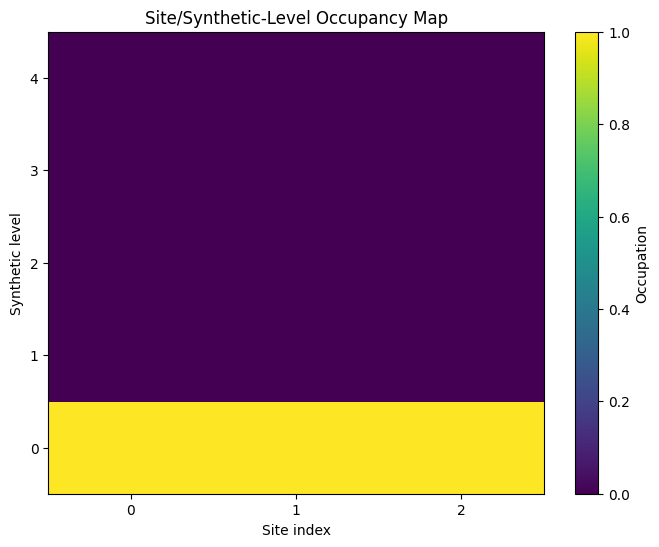

In [35]:
N_locs = range(N)
M_locs = range(M)
occupancy_grid = np.zeros((M, N))

for i, N_loc in enumerate(N_locs):
    for j, M_loc in enumerate(M_locs):
        op = single_site_number_operator(N, M, site_index=N_loc, synth_level=M_loc, states=states)
        occupancy = np.real(state.conj().T @ op @ state)
        occupancy_grid[j, i] = occupancy

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(occupancy_grid, origin='lower', cmap='viridis', aspect='auto', vmin = 0, vmax = 1)
plt.colorbar(label='Occupation')
plt.xlabel('Site index')
plt.ylabel('Synthetic level')
plt.title('Site/Synthetic-Level Occupancy Map')
plt.xticks(ticks=np.arange(N), labels=N_locs)
plt.yticks(ticks=np.arange(M), labels=M_locs)
plt.show()


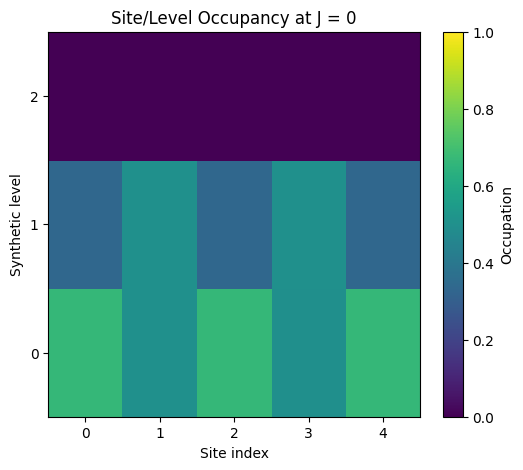

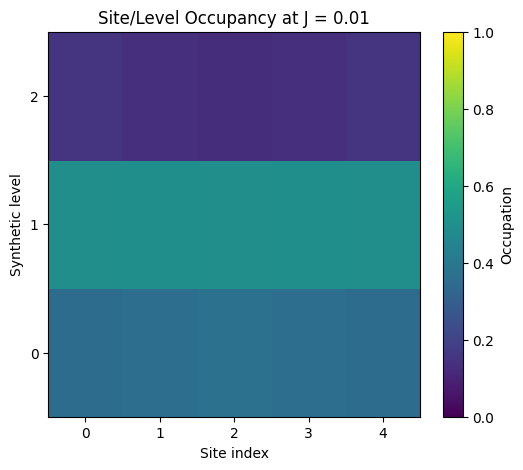

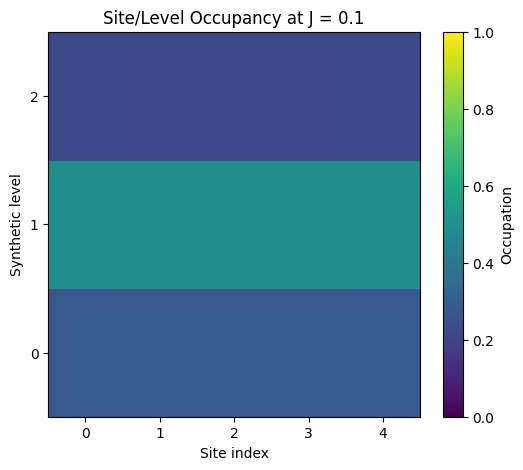

In [74]:
N = 5
M = 3
V = 1
states, _ = enumerate_states(N, M)

# @ J = 0

hamiltonian = construct_hamiltonian(N, M, V, mu, J=0)
eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

ground_state = eigenvectors[0] # some random ground state
plot_wavefunction_occupancy(ground_state, N, M, states, title="Site/Level Occupancy at J = 0")

# small perturbation with J

hamiltonian = construct_hamiltonian(N, M, V, mu, J=0.01)
eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
ground_state = eigenvectors[0]

plot_wavefunction_occupancy(ground_state, N, M, states, title="Site/Level Occupancy at J = 0.01")

# slightly larger perturbation with J

hamiltonian = construct_hamiltonian(N, M, V, mu, J=0.1)
eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
ground_state = eigenvectors[0]

plot_wavefunction_occupancy(ground_state, N, M, states, title="Site/Level Occupancy at J = 0.1")
